In [14]:
# Let's set up the libraries

import pandas as pd
import seaborn as sns
import re

# Seaborn has a lot of cool 
sns.set_theme(style='darkgrid')

In [15]:
# We are using a sample of the dataset. The full dataset is available here: https://political-emails.herokuapp.com, and was made by this person: https://twitter.com/derekwillis

df = pd.read_csv("https://github.com/tiagofassoni/useful-datasets/raw/main/10k_political_emails.csv.xz")
df = df.dropna() # I don't have any patience today to deal with null values
df = df.drop(columns='Unnamed: 0') # I made a mistake when exporting the CSV

In [16]:
df = df.rename(columns={'date': 'datetime'})
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['datetime']).dt.date


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9941 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   name      9941 non-null   object        
 1   email     9941 non-null   object        
 2   subject   9941 non-null   object        
 3   datetime  9941 non-null   datetime64[ns]
 4   year      9941 non-null   float64       
 5   month     9941 non-null   float64       
 6   day       9941 non-null   float64       
 7   hour      9941 non-null   float64       
 8   minute    9941 non-null   float64       
 9   domain    9941 non-null   object        
 10  body      9941 non-null   object        
 11  date      9941 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(6)
memory usage: 1009.6+ KB


### Let's check how many emails per day

<AxesSubplot:>

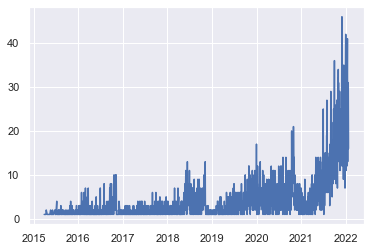

In [18]:
df.date.value_counts().sort_index().plot()

In [19]:
df

,name,email,subject,datetime,year,month,day,hour,minute,domain,body,date
0,Ronny Jackson,action@standupforliberty.net,I’m terrified of the Democrat Agenda,2020-12-27 20:35:38,2020.0,12.0,27.0,20.0,35.0,standupforliberty.net,It will destroy our nation.‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌ ‌...,2020-12-27
1,Scott Fitzgerald,staff@scottfitzgeraldforcongress.com,Victory in the Supreme Court!,2020-05-14 01:44:02,2020.0,5.0,14.0,1.0,44.0,scottfitzgeraldforcongress.com,One step closer to getting Wisconsin back open...,2020-05-14
2,Team Scheller,info@schellerforcongress.com,Test🚨Lisa in the News!🚨,2021-08-06 23:08:49,2021.0,8.0,6.0,23.0,8.0,schellerforcongress.com,"For House Republicans, their path back to powe...",2021-08-06
3,Sandy Smith,sandy1@sandysmithnc.com,Hey Fake News media - ALL LIVES MATTER!,2020-08-17 14:05:29,2020.0,8.0,17.0,14.0,5.0,sandysmithnc.com,https://clicks.aweber.com/y/ct/?l=InYvV&m=g5Px...,2020-08-17
4,State Republicans HQ,action@standupforliberty.net,Help State Republicans hold the line and get 4...,2021-01-23 20:05:30,2021.0,1.0,23.0,20.0,5.0,standupforliberty.net,We can’t let Joe Biden’s leftist agenda tsunam...,2021-01-23
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,When Democrats Turn Out,info@whendemocratsturnout.com,"Adam Schiff: ""If the truth doesn't matter, we'...",2020-01-26 01:39:29,2020.0,1.0,26.0,1.0,39.0,whendemocratsturnout.com,"""If the truth doesn't matter, we're lost. ""Fra...",2020-01-26
9996,=?utf-8?Q?=E2=9A=A0_UPDATE_=7C_WolfForPa=2Ecom?=,info@wolfforpa.com,can this be right?,2018-06-13 22:49:49,2018.0,6.0,13.0,22.0,49.0,wolfforpa.com,Last night we told you we were facing an uphil...,2018-06-13
9997,Hillary Clinton,info@hillaryclinton.com,Two challenges,2016-03-30 17:11:42,2016.0,3.0,30.0,17.0,11.0,hillaryclinton.com,Friend -- We’re heading into one of the toughe...,2016-03-30
9998,=?utf-8?Q?Joe=20Kent?=,info@joekentforcongress.com,Trump Endorsed Me,2021-09-02 02:00:29,2021.0,9.0,2.0,2.0,0.0,joekentforcongress.com,"Dear Fellow Patriot, Today I was endorsed by P...",2021-09-02


### Let's check how many emails per year and month

<AxesSubplot:xlabel='year,month'>

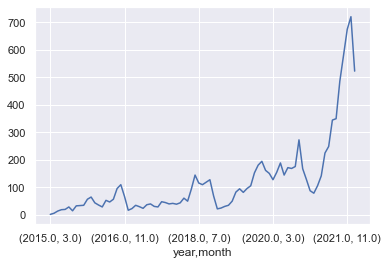

In [23]:
df.groupby(['year','month']).size().plot()
#sns.scatterplot(data=df, x='year', y='email')


 Let's create a function that, given a row, returns `Yup, has Freedom` if:
 1) `name` contains `White House`
 2) `body` contains or `freedom`

 and returns `Fake News` if:
 1) `subject` or `email` contains `Fake News` (case-insensitive)

In [12]:
!pip install ftfy

  Created wheel for ftfy: filename=ftfy-6.0.3-py3-none-any.whl size=41933 sha256=3392e1ffa9a0ece684bb4b7d8a16ca499ef5642946523edbcca5fa4fb2837de4
  Stored in directory: c:\users\ajith\appdata\local\pip\cache\wheels\3d\ee\4b\03a4e2e591ea56687aff999edc83827a2ace523baab75b8e41
Successfully built ftfy


In [62]:
df.name.value_counts().head(30)

Donald J. Trump                             144
=?utf-8?Q?The=20White=20House?=              91
DonaldJTrump.com                             89
Trump News HQ                                73
When Democrats Turn Out                      58
EMILY's List                                 58
Herschel Walker                              56
Rand Paul                                    55
GOP Presidential                             53
Nancy Pelosi                                 50
Terry McAuliffe                              44
American Update                              43
Marco Rubio                                  40
HillaryClinton.com                           39
The White House                              38
=?utf-8?Q?Indiana=20Republican=20Party?=     37
American Defense News                        35
Self Reliance Central                        34
Laura Loomer                                 32
Elizabeth Warren                             32
Jay Inslee                              

In [28]:
def number_of_words(some_text):
      return len(some_text.split(" "))
  

In [34]:
number_of_words(df.subject.iloc[0])


6

In [31]:
df.subject.apply(number_of_words).value_counts()

5     1495
4     1487
3     1306
6     1239
7      997
2      846
8      715
9      489
10     334
1      326
11     208
12     140
13      97
14      63
15      42
16      35
17      21
19      15
20      10
22      10
18      10
21       8
23       7
27       6
32       5
26       5
29       4
24       4
31       2
34       2
35       2
38       2
25       2
37       2
41       1
36       1
43       1
44       1
30       1
Name: subject, dtype: int64

In [53]:
def new_function(row):
    if "Fake news" in row['subject'] or "Fake news" in row['email']:
        return 'Fake news'
    elif "White House" in row['name'] and "Freedom" in row['body']:
        return 'Yup, had Freedom'
    else:
        return 'We dont know!'

In [56]:

df.apply(new_function, axis ='columns').value_counts()

not a Fake news     9940
Yup, had Freedom       1
dtype: int64

TypeError: string indices must be integers

In [61]:
df[df.name.str.contains('White House') & df.body.str.contains('freedom', flags=re.IGNORECASE)]

,name,email,subject,datetime,year,month,day,hour,minute,domain,body,date
14,The White House,info@mail.whitehouse.gov,"Recovery, Relief, and Reaching New Heights",2017-10-06 19:58:33,2017.0,10.0,6.0,19.0,58.0,mail.whitehouse.gov,1600 Daily https://click.mail.whitehouse.gov/?...,2017-10-06
38,The White House,info@mail.whitehouse.gov,President Macron comes to Washington,2018-04-25 14:55:45,2018.0,4.0,25.0,14.0,55.0,mail.whitehouse.gov,1600 Daily https://click.mail.whitehouse.gov/?...,2018-04-25
2027,The White House,info@mail.whitehouse.gov,An Economy That Works For Hardworking Americans,2017-10-30 14:55:34,2017.0,10.0,30.0,14.0,55.0,mail.whitehouse.gov,1600 Daily https://click.mail.whitehouse.gov/?...,2017-10-30
3459,The White House,info@mail.whitehouse.gov,President Trump's Weekly Address: Repeal and R...,2017-03-11 14:09:45,2017.0,3.0,11.0,14.0,9.0,mail.whitehouse.gov,Watch President Trump's Weekly Address to the ...,2017-03-11
4440,The White House,info@mail.whitehouse.gov,Your 1600 Daily,2017-06-12 18:00:04,2017.0,6.0,12.0,18.0,0.0,mail.whitehouse.gov,1600 Daily Everything White House for 6/12/201...,2017-06-12
9907,The White House,info@mail.whitehouse.gov,An Executive Order on Faith and Opportunity,2018-05-04 15:25:37,2018.0,5.0,4.0,15.0,25.0,mail.whitehouse.gov,1600 Daily https://click.mail.whitehouse.gov/?...,2018-05-04
